# Iris Dataset Exploration and Modeling

The purpose of this project is to analyze and model the Iris dataset. This is a simple dataset with somewhat easily separable classes. The dataset consists of four features describing three different types of Iris flowers. In this project I will:

- Perform exploratory data analysis 
- Engineer new features
- Create a preprocessing pipeline
- Test several different ML algorithms
- Fine tune parameters
- Decide on the best model
- Note feature importances
- Save the model for future loading


## Loading the Data

In [1]:
# common imports
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

iris = load_iris() # load function
df = pd.DataFrame(iris.data, columns = iris.feature_names) # saving as dataframe
df['species'] = iris.target_names[iris.target] # adding target column

In [3]:
df # viewing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory Data Analysis

In [4]:
# Checking for nulls and checking the data types. There are no nulls, and no categorical variables other than the
# labels, so there is little to no need for cleaning there.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Checking for unbalanced label counts. The categories have equal numbers of samples, so bias due to 
# disproportionate sampling won't be a problem.
df.value_counts('species') 

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data now to avoid "cheating" by looking at all the data in more depth during EDA.

x = df.drop(['species'], axis = 1) # creating x dataframe
y = df['species'] # creating y series

# Using stratify to evenly split target classes and using random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [7]:
# Looking at the descriptive statistics. The difference between the mean and median for  petal length suggests
# the distribution is skewed low for that variable.
X_train.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.00000,120.000000
mean,5.841667,3.048333,3.77000,1.205000
std,0.840926,0.448524,1.76852,0.762663
min,4.300000,2.000000,1.10000,0.100000
25%,5.100000,2.800000,1.60000,0.300000
50%,5.750000,3.000000,4.25000,1.300000
75%,6.400000,3.325000,5.10000,1.800000
max,7.900000,4.400000,6.90000,2.500000


In [8]:
# Viewing correlations: petal length x sepal length, petal width x sepal length, and petal length x petal width
# are highly correlated. This correlation could mean that these features would provide largely similar 
# information to the model. If this becomes a problem, PCA might provide a solution. 

X_train.corr() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.112327,0.880401,0.820297
sepal width (cm),-0.112327,1.000000,-0.398502,-0.338741
petal length (cm),0.880401,-0.398502,1.000000,0.963693
petal width (cm),0.820297,-0.338741,0.963693,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

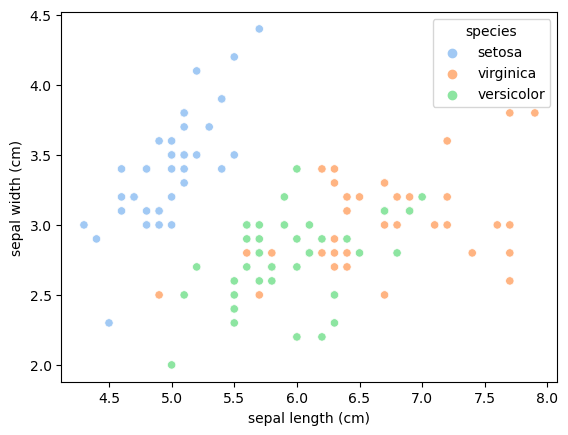

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting sepal length vs sepal width to get an idea of the relationship between variables. Setosa is well 
# separated, but Virginica and Versicolor have overlap that could cause trouble for models, feature engineering
# or PCA could provide a solution.
sns.scatterplot(x = "sepal length (cm)", y = "sepal width (cm)", hue = y_train, palette = "pastel", data = X_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

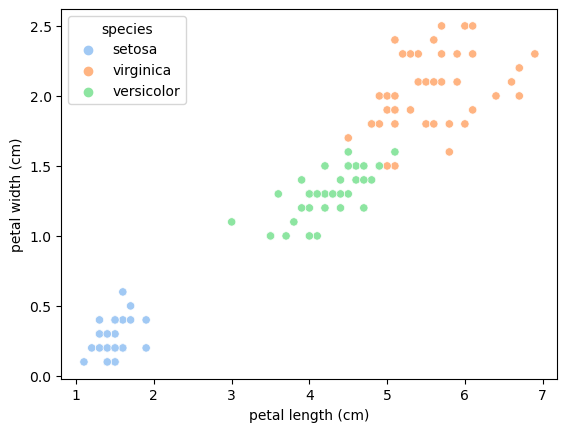

In [10]:
# Looking at the relationship between petal length and petal width between classes. Setosa is still well
# separated, and Virginica and Versicolor still have some overalap, but petal width may provide some decent 
# separation.

sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = y_train, palette = "pastel", data = X_train)
plt.show

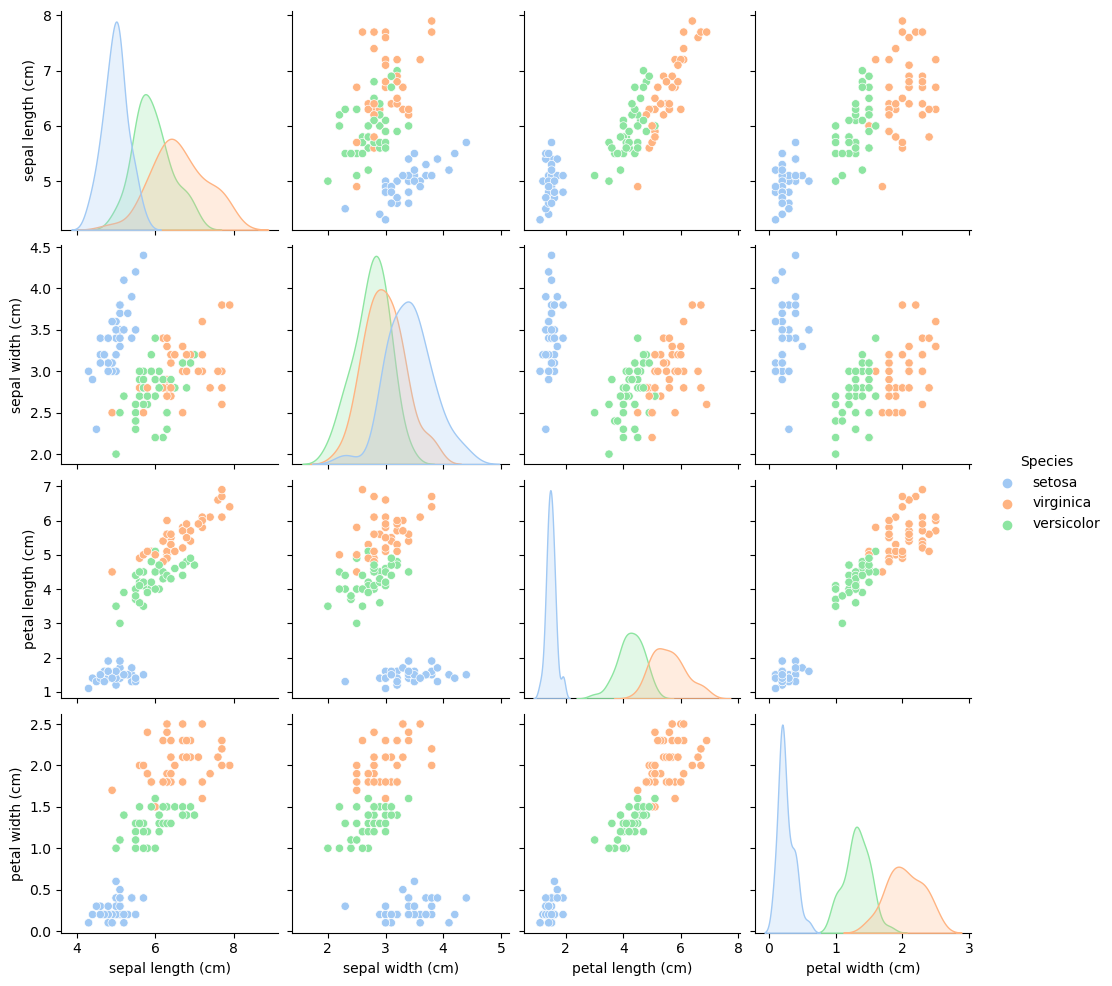

In [11]:
# Creating a combined dataframe with x_train and y_train and quickly plotting the relationship between all the
# variables in order to get a better idea of where there might be problems and where there is potential.
# Getting the model to correctly tell the difference between Virginica and Versicolor may be a problem, but
# petal width seems like it may provide the best separation out of these classes, with only a few points 
# overlapping.

train_data = X_train.copy()
train_data['Species'] = y_train
sns.pairplot(train_data, hue = 'Species', palette = 'pastel')

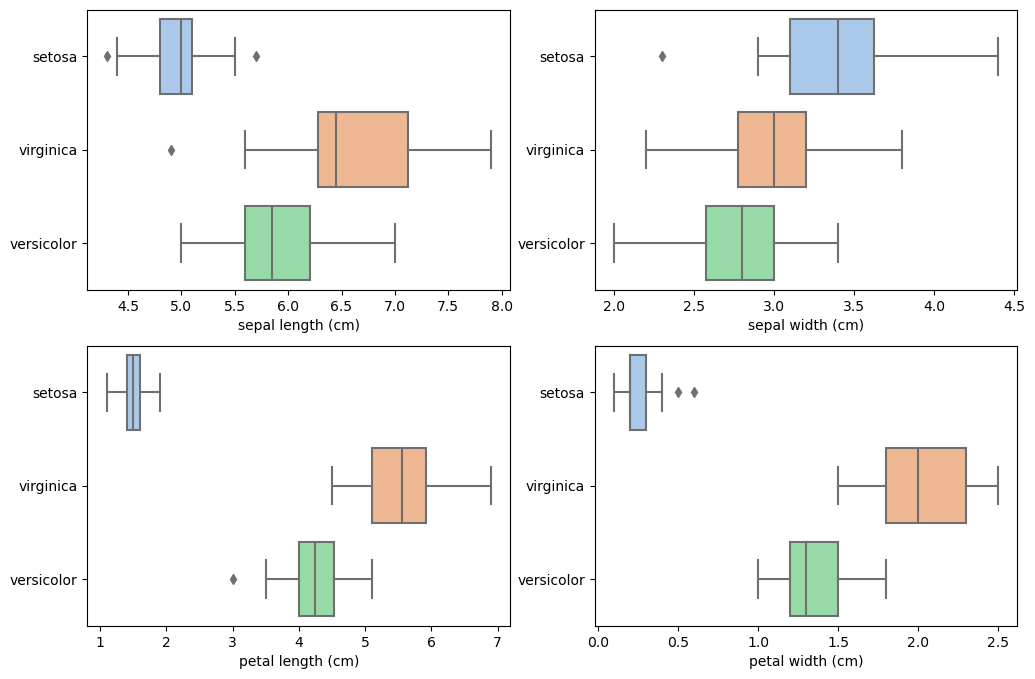

In [12]:
# Plotting the distribution of variables between species using boxplots. Setosa is well separated from the other
# classes in all but sepal width. Virginica and Versicolor have lots of overlap, but petal width provides some 
# decent separation. Petal length provides okay separation.

fig, axes = plt.subplots(2, 2, figsize = (12, 8)) # creating subplots
axes = axes.flatten()

for i, column in enumerate(X_train.columns): # iteratively plotting boxplots
    sns.boxplot(x = column, 
                y = 'Species', 
                ax = axes[i], 
                data = train_data,
                palette = 'pastel'
               )
    axes[i].set_ylabel(None) # removing 'species' since it is intuitive and in the way


## Feature Engineering

In [13]:
# Creating a custom transformer to use in the data preparation pipeline. Three engineered features were created:
# PetalRatio - the ratio between length and width of petals, SepalRatio - the ratio between length and width
# of sepals, and PetalSepalRatio - the ratio between the combined sepal measurements and the combined petal 
# measurements. 

from sklearn.base import BaseEstimator, TransformerMixin # importing custom transformer base parts

class IrisTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        x_transformed = X.copy() # creating a copy of the passed data to avoid altering the original data
        x_transformed['PetalRatio'] = X['petal width (cm)'] / X['petal length (cm)'] # creating PetalRatio
        x_transformed['SepalRatio'] = X['sepal width (cm)'] / X['sepal length (cm)'] # creating SepalRatio
       # creating PetalSepalRatio
        x_transformed['PetalSepalRatio'] = (X['petal width (cm)'] + X['petal length (cm)']) / (X['sepal width (cm)'] + X['sepal length (cm)']) 
        
        return x_transformed # returning the copied and altered dataset
        

In [14]:
Transformer = IrisTransformer() # instantiating the custom transformer

In [15]:
Transformer.fit(X_train) # training the custom transformer on the training data in order to test if it works

IrisTransformer()

In [16]:
Transformer.transform(X_train) # testing if the custom transformer works as intended

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PetalRatio,SepalRatio,PetalSepalRatio
8,4.4,2.9,1.4,0.2,0.142857,0.659091,0.219178
106,4.9,2.5,4.5,1.7,0.377778,0.510204,0.837838
76,6.8,2.8,4.8,1.4,0.291667,0.411765,0.645833
9,4.9,3.1,1.5,0.1,0.066667,0.632653,0.200000
89,5.5,2.5,4.0,1.3,0.325000,0.454545,0.662500
...,...,...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,0.071429,0.734694,0.176471
2,4.7,3.2,1.3,0.2,0.153846,0.680851,0.189873
33,5.5,4.2,1.4,0.2,0.142857,0.763636,0.164948
52,6.9,3.1,4.9,1.5,0.306122,0.449275,0.640000


## Creating the Preprocessing Pipeline

In [17]:
# Creating a pipeline in order to preprocess the data. This particular dataset is pretty clean, so no
# imputer step is necessary. A StandardScalar is included because certain algorithms, like SVMs, are sensitive
# to broad ranges in values. This dataset would probably be okay without it, but it is included as a best practice.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline([   # There are no categorical variables, so just a numeric pipeline will do.
    ('custom transformer', IrisTransformer()),
    ('scaler', StandardScaler())
])



In [18]:
X_train_transformed = numeric_pipeline.fit_transform(X_train) # creating a transformed X_train

In [19]:
# Creating a transformed X_test - .transform is used instead of .fit_transform in order to keep the pipeline
# from peeking at the test data.
X_test_transformed = numeric_pipeline.transform(X_test)

In [20]:
# Encoding the labels - .transform is used here in the same way as above.

from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

y_train_transformed = Encoder.fit_transform(y_train)
y_test_transformed = Encoder.transform(y_test)

## Testing Algorithms/Fine Tuning Parameters

### 1. Logistic Regression

In [21]:
# Creating and fitting a Logistic Regression model first. This is a fairly simple dataset, so a simple model like 
# logistic regression might do quite well. A more powerful model might risk overfitting.

import warnings # importing warnings
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 

# importing desired score functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

warnings.filterwarnings('ignore') # filtering non-essential warnings produced by GridSearch

# The saga solver was used because it allows for l1, l2, and elastic penalty type. max_iter = 5000 was set to 
# allow for convergence.
LR = LogisticRegression(solver = 'saga', max_iter = 5000) 
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'], # trying different penalties
    'C': [0.001, .01, .1, 1, 10, 100], # trying different regularization strengths
    'l1_ratio': [0, 0.5, 1] # l1 ratio options for potential solutions using l1 penalties
}

# Saving score types for GridSearch. macro has to be used because this is not binomial classification
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'] 

# creating the grid search
lr_grid_search = GridSearchCV(
    estimator = LR, 
    param_grid = lr_param_grid,
    cv = 5,
    scoring = scoring_metrics,
    refit = 'accuracy' # accuracy will be used when evaluating the 'best model'
)

lr_grid_search.fit(X_train_transformed, y_train_transformed) # calling GridSearch

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [22]:
lr_results = pd.DataFrame(lr_grid_search.cv_results_) # saving the results as a DataFrame
lr_columns = [
    'mean_test_accuracy', 
    'mean_test_f1_macro',
    'mean_test_precision_macro', 
    'mean_test_recall_macro', 
    'param_C', 
    'param_l1_ratio', 
    'param_penalty',
] # saving the column names that I want to see

# Filtering the appropriate columns, sorting by accuracy and F1, and then trimming the results.
lr_results = lr_results[lr_columns].sort_values(by = ['mean_test_accuracy', 'mean_test_f1_macro'],ascending = False).head(10)

In [23]:
# Viewing the results. The best l1_ratio could be debatable, but C = 1 and an l1 penalty consistently perform well.
lr_results 

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_C,param_l1_ratio,param_penalty
27,0.966667,0.966536,0.970370,0.966667,1.0,0.0,l1
30,0.966667,0.966536,0.970370,0.966667,1.0,0.5,l1
33,0.966667,0.966536,0.970370,0.966667,1.0,1.0,l1
35,0.966667,0.966536,0.970370,0.966667,1.0,1.0,elasticnet
36,0.966667,0.966337,0.971852,0.966667,10.0,0.0,l1
37,0.966667,0.966337,0.971852,0.966667,10.0,0.0,l2
38,0.966667,0.966337,0.971852,0.966667,10.0,0.0,elasticnet
39,0.966667,0.966337,0.971852,0.966667,10.0,0.5,l1
40,0.966667,0.966337,0.971852,0.966667,10.0,0.5,l2
41,0.966667,0.966337,0.971852,0.966667,10.0,0.5,elasticnet


In [24]:
lr_best_results = lr_results.head(1) # trimming to 1 row so only the best parameters are shown
lr_best_results

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_C,param_l1_ratio,param_penalty
27,0.966667,0.966536,0.97037,0.966667,1.0,0.0,l1


In [25]:
# Creating a Logistic Regression using the best parameters. These may vary by individual run of the notebook,
# but these were the best for me. I could use the best_estimator_ attribute of GridSearch, but I want to hard 
# code these this time around so they don't change.
best_lr = LogisticRegression(
    solver = 'saga', 
    max_iter = 5000, 
    C = 1, 
    penalty = 'l1', 
    l1_ratio = 0
)

best_lr.fit(X_train_transformed, y_train_transformed) # training the best Logistic Regression

LogisticRegression(C=1, l1_ratio=0, max_iter=5000, penalty='l1', solver='saga')

In [26]:
best_lr_predictions = best_lr.predict(X_test_transformed) # making predictions on the test data using the best LR

In [27]:
best_lr_predictions # viewing

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

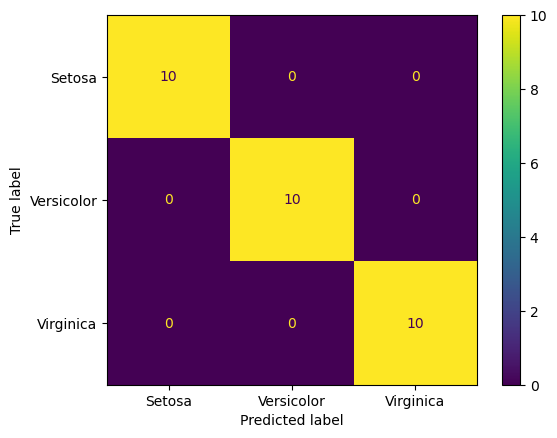

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating a confusion matrix with the predictions. This model was able to predict all of the test instances
# correctly. The testing data is limited, so this might not be completely reflectice of the model's ability, but
# this is still pretty good.

lr_cm = confusion_matrix(y_test_transformed, best_lr_predictions) 

display_labels = ['Setosa', 'Versicolor', 'Virginica'] # saving the label names for this and future CMs

# plotting the matrix
lr_matrix = ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = display_labels) 
lr_matrix.plot()
plt.show()



In [29]:
# Calculating the final scoring metrics and printing them. This model does well on the testing data, but
# there are few instances, so I would like to get the accuracy score on the training data up, since I think
# that that score might more accurately reflect the ability of the model.
lr_accuracy = accuracy_score(y_test_transformed, best_lr_predictions) # calculating accuracy
lr_recall = recall_score(y_test_transformed, best_lr_predictions, average = 'macro') # calculating recall
lr_precision = precision_score(y_test_transformed, best_lr_predictions, average = 'macro') # calculating precision
lr_f1 = f1_score(y_test_transformed, best_lr_predictions, average = 'macro')# calculating F1

# printing the scores
print(f'Final logistic regression accuracy: {lr_accuracy}')
print(f'Final logistic regression macro-averaged recall: {lr_recall}')
print(f'Final logistic regression macro-averaged precision: {lr_precision}')
print(f'Final logistic regression macro-averaged f1: {lr_f1}')

Final logistic regression accuracy: 1.0
Final logistic regression macro-averaged recall: 1.0
Final logistic regression macro-averaged precision: 1.0
Final logistic regression macro-averaged f1: 1.0


### 2. K-Neighbors Classifier

In [30]:
# Trying a K-Neighbors Classifier next. This model might be able to identify the points that overlap between
# Versicolor and Virginica better because it considers the neighboring points. On the other hand, it might struggle
# more if these points are closer to more points of the other class than of its own.

from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier() # instantiating with default parameters

KN_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 12], # testing various #s of neighbors
    'weights': ['uniform', 'distance'] # trying different weight calculations
}

# creating the GridSearch
KN_grid_search = GridSearchCV(     
    estimator = KN, 
    param_grid = KN_param_grid,
    cv = 5,
    scoring = scoring_metrics,
    refit = 'accuracy'
)

KN_grid_search.fit(X_train_transformed, y_train_transformed) # fitting the GridSearch on the training data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 12],
                         'weights': ['uniform', 'distance']},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [31]:
KN_results = pd.DataFrame(KN_grid_search.cv_results_) # saving the results
KN_columns = [
    'mean_test_accuracy', 
    'mean_test_f1_macro',
    'mean_test_precision_macro', 
    'mean_test_recall_macro', 
    'param_n_neighbors', 
    'param_weights'
] # saving the appropriate column names

# filtering and sorting
KN_results = KN_results[KN_columns].sort_values(by = ['mean_test_accuracy', 'mean_test_f1_macro'],ascending = False)

In [32]:
# Viewing the results. It seems that 7 neighbors might be best. Although it's close, uniform weights might be best.

KN_results 

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_n_neighbors,param_weights
4,0.975000,0.974902,0.977778,0.975000,7,uniform
5,0.975000,0.974902,0.977778,0.975000,7,distance
6,0.975000,0.974703,0.979259,0.975000,10,uniform
8,0.975000,0.974703,0.979259,0.975000,12,uniform
9,0.975000,0.974703,0.979259,0.975000,12,distance
0,0.966667,0.966601,0.968519,0.966667,3,uniform
1,0.966667,0.966601,0.968519,0.966667,3,distance
2,0.966667,0.966337,0.971852,0.966667,5,uniform
3,0.966667,0.966337,0.971852,0.966667,5,distance
7,0.966667,0.966337,0.971852,0.966667,10,distance


In [33]:
# Trimming to only see the best results. This might change from run to run, but this time it was 7 neighbors and
# uniform weights.
KN_best_results = KN_results.head(1) 
KN_best_results 

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_n_neighbors,param_weights
4,0.975,0.974902,0.977778,0.975,7,uniform


In [34]:
best_KN = KNeighborsClassifier(n_neighbors = 7) # instantiating with the best settings

best_KN.fit(X_train_transformed, y_train_transformed) # fitting the best model

KNeighborsClassifier(n_neighbors=7)

In [35]:
best_KN_predictions = best_KN.predict(X_test_transformed) # making and saving predictions

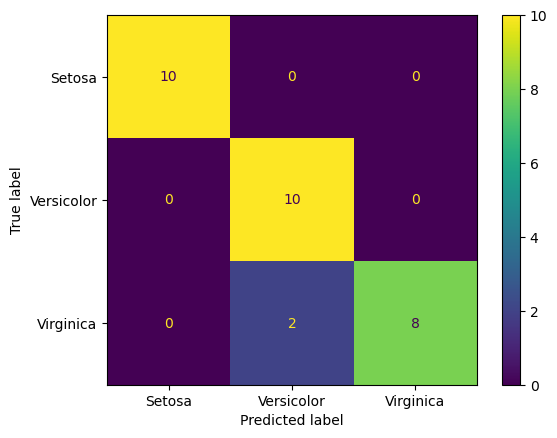

In [36]:
# Creating and viewing the confusion matrix. This model did worse on the test data than the LR. As expected,
# it looks like the model struggled with Versicolor vs Virginica points. It might be possible for this model
# to perform better with more test data, but I doubt it.

KN_cm = confusion_matrix(y_test_transformed, best_KN_predictions) # creating the matrix

# plotting
KN_matrix = ConfusionMatrixDisplay(confusion_matrix = KN_cm, display_labels = display_labels) 
KN_matrix.plot()
plt.show()

In [37]:
# Calculating and printing the final scoring metrics. This model did worse on the test data than the LR, likely 
# because of the overlap of points between Virginica and Versicolor. I will explore more below.

# calculating the scores
KN_accuracy = accuracy_score(y_test_transformed, best_KN_predictions)
KN_recall = recall_score(y_test_transformed, best_KN_predictions, average = 'macro')
KN_precision = precision_score(y_test_transformed, best_KN_predictions, average = 'macro')
KN_f1 = f1_score(y_test_transformed, best_KN_predictions, average = 'macro')

# printing the scores
print(f'Final K Neighbors accuracy: {round(KN_accuracy, 4)}')
print(f'Final K Neighbors macro-averaged recall: {round(KN_recall, 4)}')
print(f'Final K Neighbors macro-averaged precision: {round(KN_precision, 4)}')
print(f'Final K Neighbors macro-averaged f1: {round(KN_f1, 4)}')

Final K Neighbors accuracy: 0.9333
Final K Neighbors macro-averaged recall: 0.9333
Final K Neighbors macro-averaged precision: 0.9444
Final K Neighbors macro-averaged f1: 0.9327


In [38]:
#finding the indices of the missed predictions
KN_incorrect_predictions = np.where(best_KN_predictions != y_test_transformed)[0] 

In [39]:
KN_incorrect_predictions # viewing

array([19, 23])

In [40]:
transformed_feature_names = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)',
    'petal ratio',
    'sepal ratio',
    'petal-sepal ratio'
] # saving the appropriate column names

# sving a dataframe of the missed points
KN_incorrect_points = pd.DataFrame(
    X_test_transformed, 
    columns = transformed_feature_names
).iloc[[19, 23]] # indexing the rows

In [41]:
KN_incorrect_points # viewing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal ratio,sepal ratio,petal-sepal ratio
19,0.189074,-0.108213,0.584850,0.783432,0.941291,-0.288089,0.733262
23,0.308489,-1.003766,1.039102,0.256755,-0.341036,-0.915087,1.015454


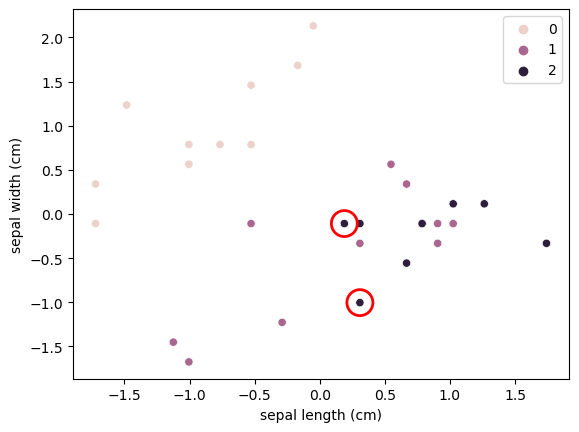

In [42]:
# It looks like the missed points were both Virginica points that were surrounded by Versicolor points.
# I thought that this model might work because it might potentially look past the points' immediate surroundings,
# but it looks like some of these points are buried too deep.

# creating a dataframe of the transformed X_test data
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns = transformed_feature_names)

# plotting
sns.scatterplot(
    x = 'sepal length (cm)', 
    y = 'sepal width (cm)', 
    data = X_test_transformed_df, 
    hue = y_test_transformed
)

# saving the coordinates of the missed points
KN_circles = [
    (.189074, -.108213),
    (.308489, -1.003766)
]

# circling the missed points
for (x, y) in KN_circles:
    plt.scatter(
        x,
        y,
        s = 350,
        facecolors = 'none',
        edgecolors = 'red',
        linewidth = 2,
        zorder = 5
    )

### 3. Support Vector Classifier

In [43]:
# Trying a Support Vector Classifier next because it might be able to create a more complex boundary between 
# Versicolor and Virginica. 
from sklearn.svm import SVC

SV = SVC() # instantiating with default parameters

SV_param_grid = {
    'C': [.001, .01, .1, 1, 10], # trying various regularization strengths
    'kernel': ['linear', 'rbf', 'sigmoid'], # trying different kernels
    'tol': [.001, .0001] # trying different tolerances
}

# creating the GridSearch
SV_grid_search = GridSearchCV(
    estimator = SV, 
    param_grid = SV_param_grid,
    cv = 5,
    scoring = scoring_metrics,
    refit = 'accuracy'
)

SV_grid_search.fit(X_train_transformed, y_train_transformed) # fitting the GridSearch

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.0001]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [44]:
SV_results = pd.DataFrame(SV_grid_search.cv_results_) # saving the results
SV_columns = [
    'mean_test_accuracy', 
    'mean_test_f1_macro',
    'mean_test_precision_macro', 
    'mean_test_recall_macro', 
    'param_C', 
    'param_kernel',
    'param_tol'
] # saving the appropriate columns

# filtering, sorting, and trimming
SV_results = SV_results[SV_columns].sort_values(by = ['mean_test_accuracy', 'mean_test_f1_macro'],ascending = False).head(10)

In [45]:
# Viewing the results. It looks like the default parameters of C = 1, and rbf kernel are best. A tol of .0001 could
# possibly be good, but not in the "best" case here, and not reliably enough to matter.

SV_results

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_C,param_kernel,param_tol
20,0.975000,0.974902,0.977778,0.975000,1.0,rbf,0.0010
21,0.975000,0.974902,0.977778,0.975000,1.0,rbf,0.0001
18,0.966667,0.966536,0.970370,0.966667,1.0,linear,0.0010
19,0.966667,0.966536,0.970370,0.966667,1.0,linear,0.0001
26,0.966667,0.966536,0.970370,0.966667,10.0,rbf,0.0010
27,0.966667,0.966536,0.970370,0.966667,10.0,rbf,0.0001
12,0.966667,0.966337,0.971852,0.966667,0.1,linear,0.0010
13,0.966667,0.966337,0.971852,0.966667,0.1,linear,0.0001
22,0.958333,0.958235,0.961111,0.958333,1.0,sigmoid,0.0010
23,0.958333,0.958235,0.961111,0.958333,1.0,sigmoid,0.0001


In [46]:
SV_best_results = SV_results.head(1) # trimming so only the "best" results are shown
SV_best_results

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_C,param_kernel,param_tol
20,0.975,0.974902,0.977778,0.975,1.0,rbf,0.001


In [47]:
# Instantiating with the best results. In this case it is the default parameters.
best_SV = SVC() 

best_SV.fit(X_train_transformed, y_train_transformed)

SVC()

In [48]:
best_SV_predictions = best_SV.predict(X_test_transformed) # predicting and saving the predictions

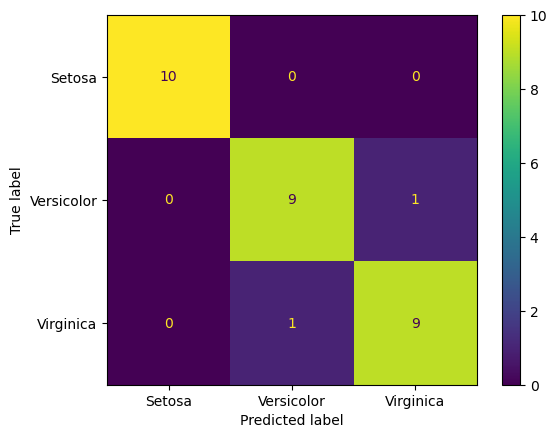

In [49]:
# Creating and viewing the confusion matrix. It looks like this model was able to get one less Virginica
# instance wrong than the K-Neighbors model, but it also missed a Versicolor that that model did not. It also
# performed worse than the Logistic Regression on the test data.

SV_cm = confusion_matrix(y_test_transformed, best_SV_predictions) # creating the CM

# plotting
SV_matrix = ConfusionMatrixDisplay(confusion_matrix = SV_cm, display_labels = display_labels)
SV_matrix.plot()
plt.show()

In [50]:
# This model did better on the training data than the Logistic Regression, but it did not do as well on the test
# data. It could potentially be overfitting the training data since it is doing well there but missing points on 
# the test data.

# calculating scores
SV_accuracy = accuracy_score(y_test_transformed, best_SV_predictions)
SV_recall = recall_score(y_test_transformed, best_SV_predictions, average = 'macro')
SV_precision = precision_score(y_test_transformed, best_SV_predictions, average = 'macro')
SV_f1 = f1_score(y_test_transformed, best_SV_predictions, average = 'macro')

# printing scores
print(f'Final SVC accuracy: {round(SV_accuracy, 4)}')
print(f'Final SVC macro-averaged recall: {round(SV_recall, 4)}')
print(f'Final SVC macro-averaged precision: {round(SV_precision, 4)}')
print(f'Final SVC macro-averaged f1: {round(SV_f1, 4)}')

Final SVC accuracy: 0.9333
Final SVC macro-averaged recall: 0.9333
Final SVC macro-averaged precision: 0.9333
Final SVC macro-averaged f1: 0.9333


### 4. Gradient Boosting Classifier / Deciding on the Best Model

In [51]:
# Finally, I will try a Gradient Boosting Classifier. As an ensemble learning method it has the ability to draw 
# powerful connections in the data that the other models may have missed, but this also greatly increases
# the risk of overfitting. This cell may take 3-5 minutes to run.
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier() # instantiating with the default settings

GBC_param_grid = {
    'n_estimators': [50, 100, 150, 200], # trying different #s of estimators
    'learning_rate': [.001, .01], # trying different learning rates
    'max_depth': [2, 3, 5], # trying different maximum depths for the individual trees
    'subsample': [.1, .25, .50] # trying different subsample values -  subsample <1  = stochastic gradient boosting
}

# creating the GridSearch
GBC_grid_search = GridSearchCV(
    estimator = GBC, 
    param_grid = GBC_param_grid,
    cv = 5,
    scoring = scoring_metrics,
    refit = 'accuracy'
)

GBC_grid_search.fit(X_train_transformed, y_train_transformed) # fitting the GridSearch

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [2, 3, 5],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.1, 0.25, 0.5]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [52]:
GBC_results = pd.DataFrame(GBC_grid_search.cv_results_) # saving the results as a DataFrame

GBC_columns = [
    'mean_test_accuracy', 
    'mean_test_f1_macro',
    'mean_test_precision_macro', 
    'mean_test_recall_macro', 
    'param_n_estimators', 
    'param_learning_rate',
    'param_max_depth',
    'param_subsample'
] # saving the appropriate column names

# filtering, sorting, and trimming
GBC_results = GBC_results[GBC_columns].sort_values(by = ['mean_test_accuracy', 'mean_test_f1_macro'],ascending = False).head(10)

In [53]:
# Viewing the results. Looks like best n_estimators might be 50, but not definitively. The best learning rate
# looks like .001, the best max_depth looks like 2, and the best subsample looks like .25.

GBC_results

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_n_estimators,param_learning_rate,param_max_depth,param_subsample
7,0.983333,0.983268,0.985185,0.983333,150,0.001,2,0.25
25,0.983333,0.983268,0.985185,0.983333,50,0.001,5,0.25
1,0.975000,0.974902,0.977778,0.975000,50,0.001,2,0.25
4,0.975000,0.974902,0.977778,0.975000,100,0.001,2,0.25
19,0.975000,0.974902,0.977778,0.975000,150,0.001,3,0.25
22,0.975000,0.974902,0.977778,0.975000,200,0.001,3,0.25
28,0.975000,0.974902,0.977778,0.975000,100,0.001,5,0.25
31,0.975000,0.974902,0.977778,0.975000,150,0.001,5,0.25
33,0.975000,0.974902,0.977778,0.975000,200,0.001,5,0.10
36,0.975000,0.974902,0.977778,0.975000,50,0.010,2,0.10


In [54]:
GBC_best_results = GBC_results.head(1) # filtering the results so only the best params are shown
GBC_best_results

,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,param_n_estimators,param_learning_rate,param_max_depth,param_subsample
7,0.983333,0.983268,0.985185,0.983333,150,0.001,2,0.25


In [55]:
best_GBC = GradientBoostingClassifier(
    n_estimators = 50, 
    learning_rate = .001, 
    max_depth = 5, 
    subsample = .25
) # instantiating with the best params

best_GBC.fit(X_train_transformed, y_train_transformed) # fitting the best model

GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=50,
                           subsample=0.25)

In [56]:
best_GBC_predictions = best_GBC.predict(X_test_transformed) # predicting and saving the predictions

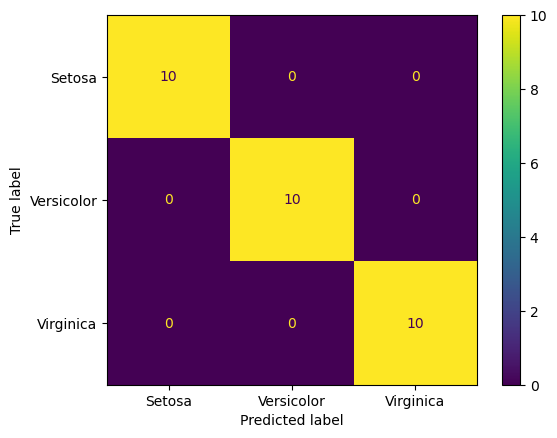

In [57]:
# Creating and viewing the confusion matrix. It looks like this model was able to score as well as the 
# K-Neighbors and SVC models on the training data as well as get 100% on the testing data. I would argue that
# this model is likely the best out of the ones tried here because of its ability to draw complex insights from 
# the training data, score well in training, and identify the test set perfectly.

GBC_cm = confusion_matrix(y_test_transformed, best_GBC_predictions) # creating the CM

# plotting
GBC_matrix = ConfusionMatrixDisplay(confusion_matrix = GBC_cm, display_labels = display_labels)
GBC_matrix.plot()
plt.show()

In [58]:
# calculating the scores
GBC_accuracy = accuracy_score(y_test_transformed, best_GBC_predictions)
GBC_recall = recall_score(y_test_transformed, best_GBC_predictions, average = 'macro')
GBC_precision = precision_score(y_test_transformed, best_GBC_predictions, average = 'macro')
GBC_f1 = f1_score(y_test_transformed, best_GBC_predictions, average = 'macro')

# printing the scores
print(f'Final Gradient Boosted Classifier accuracy: {round(GBC_accuracy, 4)}')
print(f'Final Gradient Boosted Classifier macro-averaged recall: {round(GBC_recall, 4)}')
print(f'Final Gradient Boosted Classifier macro-averaged precision: {round(GBC_precision, 4)}')
print(f'Final Gradient Boosted macro-averaged f1: {round(GBC_f1, 4)}')

Final Gradient Boosted Classifier accuracy: 1.0
Final Gradient Boosted Classifier macro-averaged recall: 1.0
Final Gradient Boosted Classifier macro-averaged precision: 1.0
Final Gradient Boosted macro-averaged f1: 1.0


## Feature Importances

In [59]:
# Calculating the feature importances in order to see what the best model thought the most important traits were.

# saving the importances as a DataFrame
GBC_feature_importance = pd.DataFrame({
    'Feature Name': transformed_feature_names,
    'Importance': best_GBC.feature_importances_
})

In [60]:
# sorting the dataframe by importance
GBC_feature_importance.sort_values('Importance', ascending = False, inplace = True) 

<AxesSubplot: xlabel='Importance', ylabel='Feature Name'>

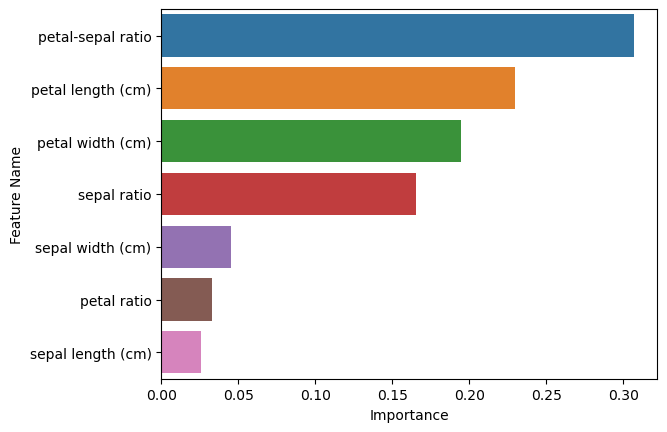

In [61]:
# Plotting the importances. It looks like the PetalSepalRatio engineered feature ended up being the most
# 'important.' Petal width and petal length were also important as the explorations at the beginning predicted, but
# I did not expect them to be that close.

sns.barplot(x = 'Importance', y = 'Feature Name', data = GBC_feature_importance)

## Saving the Model

In [62]:
# Using Pickle to save the model for potential future use.
import pickle

filename = 'Iris_Best_Model.pkl' # setting the filename

with open(filename, 'wb') as file:
    pickle.dump(best_GBC, file) # saving the model

In [63]:
with open(filename, 'rb') as file: 
    loaded_model = pickle.load(file) # loading the model

In [64]:
loaded_predictions = loaded_model.predict(X_train_transformed) # predicting to test the loaded model

In [65]:
loaded_predictions # viewing

array([0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])